## FORECAST THE TREND AIRLINE SALES WITH RESPECT TO TIME

In [2]:
# import libraries of pandas for data frame Modification

import pandas as pd

# import numpy for numerical scientific computing

import numpy as np

In [3]:
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.dtypes

Month                                                                              object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    float64
dtype: object

### Month is in object format
### Airline passengers are in Float64 format
### if we want to work with the Timeseries data. We should convert Month data object format to the Date Format

In [5]:
df.index = pd.to_datetime(df.index,format = '%Y-%m-%d')

In [6]:
df.Month.value_counts()

1953-11    1
1949-04    1
1949-08    1
1954-09    1
1950-10    1
          ..
1960-03    1
1957-03    1
1953-02    1
1960-12    1
1959-11    1
Name: Month, Length: 145, dtype: int64

In [6]:
df['Month'] = pd.to_datetime(df['Month'], format= '%Y-%m-%d')

ValueError: time data International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60 doesn't match format specified

In [7]:
# find out the there is an string which is causing the problem while conversion
df.tail(5)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
1970-01-01 00:00:00.000000140,1960-09,508.0
1970-01-01 00:00:00.000000141,1960-10,461.0
1970-01-01 00:00:00.000000142,1960-11,390.0
1970-01-01 00:00:00.000000143,1960-12,432.0
1970-01-01 00:00:00.000000144,International airline passengers: monthly tota...,NaN


In [8]:
# taken only rows of data which is between 0 to 143
df = df[:144]

In [9]:
# Coverting the month column to date format

df['Month'] = pd.to_datetime(df['Month'], format= '%Y-%m-%d')

In [10]:
df.dtypes

Month                                                                             datetime64[ns]
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60           float64
dtype: object

### We can see it got converted to the date format.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000000143
Data columns (total 2 columns):
Month                                                                             144 non-null datetime64[ns]
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


# There is 144 Entries. we can see them every column same data points also

In [12]:
# is there any null charecters

df.isnull().sum()

Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    0
dtype: int64

In [13]:
# change the column to Meaning full convention

df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'Sales'}, inplace=True)

In [14]:
# casting the Sales to the integer type

df['Sales'] = df['Sales'].astype('int')

In [15]:
df.head()

,Month,Sales
1970-01-01 00:00:00.000000000,1949-01-01,112
1970-01-01 00:00:00.000000001,1949-02-01,118
1970-01-01 00:00:00.000000002,1949-03-01,132
1970-01-01 00:00:00.000000003,1949-04-01,129
1970-01-01 00:00:00.000000004,1949-05-01,121


In [16]:
# importing the Matplotlib library

import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

%matplotlib inline

In [17]:
# setting the month as index

df.set_index('Month',inplace=True)

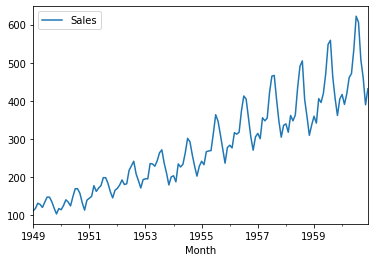

In [18]:
df.plot()

We can see the upward trend and there is sesonality for every 12 Months

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


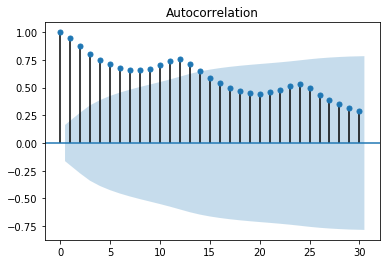

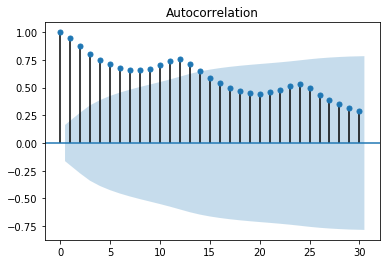

In [19]:
# plotting ACF of the Sales

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Sales, lags = 30)

We can see there is relation between month  and  months lag By ACF plot. If everthing is correlated. It means we can't predict the monthly sales or might be beacuse combination of seasonality and trend in the data. We will check it using by ADF Test.

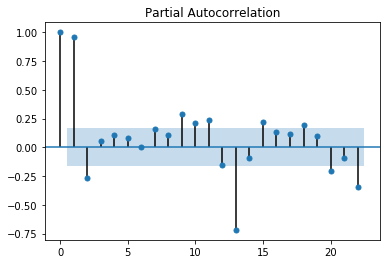

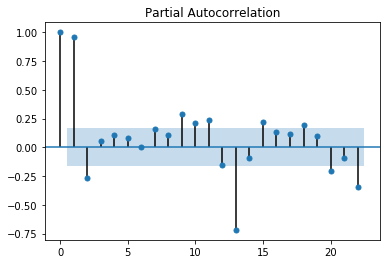

In [20]:
# plotting PACF of the Sales

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df.Sales)

In PACF we are able to see there is four Months outside of confidence interval. 

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adf= adfuller(df.Sales)

In [23]:
adf

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In ADF test,
Null Hypothesis- it is not stationary

Alternative Hypothesis - it is stationary

P value of 0.99. so we will reject the Null and Accept the Alternative Hypothesis.

it indicates in our Monthly sales data we have predictable component(local Component) which we can be predicted by the ARIMA, SARIMAX.

# I have taken the SARIMAX. Since we see sesaonilty in our data. Refering the Monthly sales data Plot.

# Now We apply the SARIMAX

In [24]:
# creating the values which are required for training the SARIMA
import itertools

p=d=q=range(0,2)

parameters = list(itertools.product(p,d,q))

seasonal = [(X[0],X[1],X[2], 12) for X in list(itertools.product(p,d,q))]

In [25]:
train_data = df['1949-01-01':'1959-12-01']

test_data = df['1960-01-01':'1960-12-01']

In [26]:
import warnings

warnings.filterwarnings('ignore')

In [27]:
# import Sarimax 
import statsmodels.api as sm

AIC = []
SARIMAX_Model = []

for param in parameters:
    for s in seasonal:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,order = param, seasonal_order = s, enforce_stationarity=False,enforce_invertibility=False)
            result = mod.fit()
            print('Sarimax {}X{}-> aic {}'.format(param,s,result.aic))
            AIC.append(result.aic)
            SARIMAX_Model.append([(param,s)])
        except:
            continue

Sarimax (0, 0, 0)X(0, 0, 0, 12)-> aic 1853.867132204165
Sarimax (0, 0, 0)X(0, 0, 1, 12)-> aic 1575.2927100521713
Sarimax (0, 0, 0)X(0, 1, 0, 12)-> aic 1183.7768361260032
Sarimax (0, 0, 0)X(0, 1, 1, 12)-> aic 1039.3684612710654
Sarimax (0, 0, 0)X(1, 0, 0, 12)-> aic 1018.1128824449078
Sarimax (0, 0, 0)X(1, 0, 1, 12)-> aic 1008.0082399524431
Sarimax (0, 0, 0)X(1, 1, 0, 12)-> aic 999.1896494904967
Sarimax (0, 0, 0)X(1, 1, 1, 12)-> aic 930.7565628459058
Sarimax (0, 0, 1)X(0, 0, 0, 12)-> aic 1670.973170557125
Sarimax (0, 0, 1)X(0, 0, 1, 12)-> aic 1409.6308436189008
Sarimax (0, 0, 1)X(0, 1, 0, 12)-> aic 1071.986835959657
Sarimax (0, 0, 1)X(0, 1, 1, 12)-> aic 954.973278595859
Sarimax (0, 0, 1)X(1, 0, 0, 12)-> aic 962.7908430205107
Sarimax (0, 0, 1)X(1, 0, 1, 12)-> aic 944.0610706119247
Sarimax (0, 0, 1)X(1, 1, 0, 12)-> aic 947.4386036577605
Sarimax (0, 0, 1)X(1, 1, 1, 12)-> aic 876.8976472269511
Sarimax (0, 1, 0)X(0, 0, 0, 12)-> aic 1267.4912483529858
Sarimax (0, 1, 0)X(0, 0, 1, 12)-> aic 1066

In [28]:
# Minimum value is
min(AIC)

802.8580194673824

In [29]:
# the  values provides Minimum AIC values are
SARIMAX_Model[AIC.index(min(AIC))]

[((0, 1, 1), (1, 1, 1, 12))]

In [30]:
SARIMAX_Model[AIC.index(min(AIC))][0][1]

(1, 1, 1, 12)

In [31]:
#developing the final Model

final = sm.tsa.statespace.SARIMAX(train_data,order=SARIMAX_Model[AIC.index(min(AIC))][0][0],seasonal_order=SARIMAX_Model[AIC.index(min(AIC))][0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_final= final.fit()

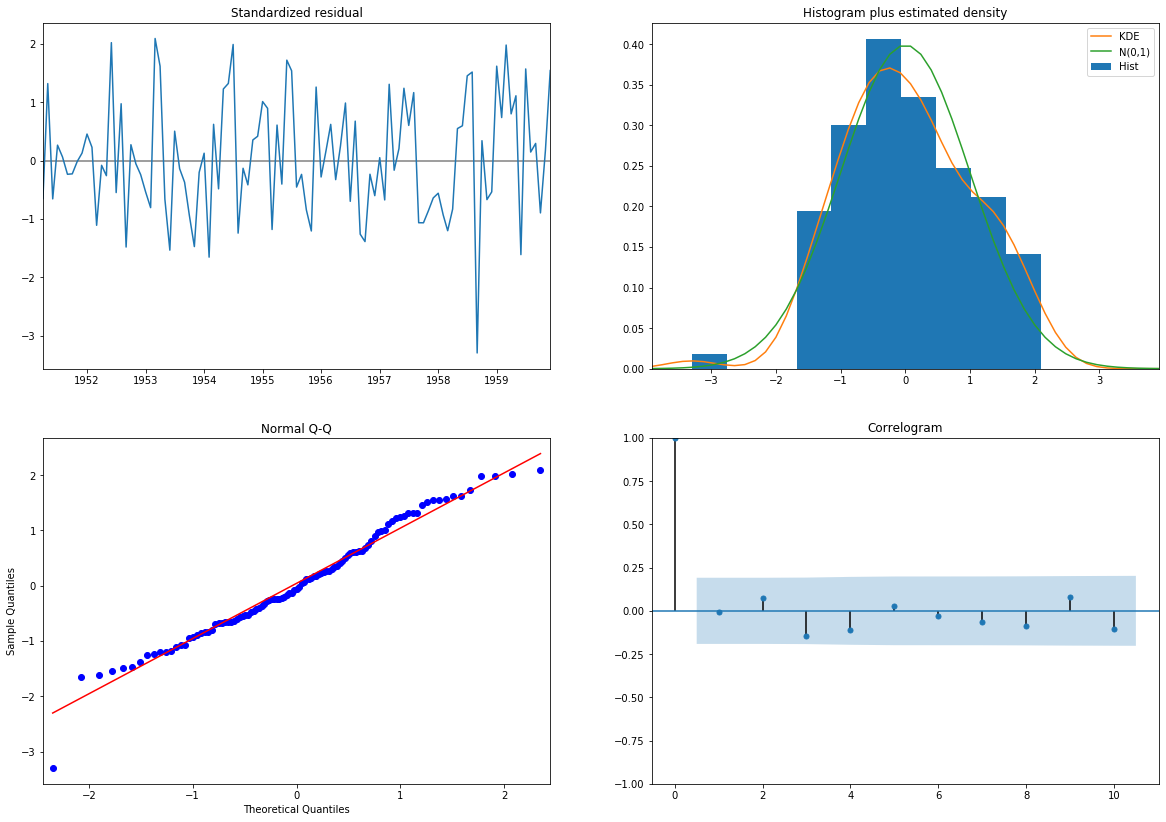

In [32]:
results_final.plot_diagnostics(figsize =(20,14))
plt.show()

Top left and rightplots  tells that Residuals mean around zero and constant variance. 

qq-plot-> How the Residuals are Normally distrubuted.

The correlgram tells that there is no Correlation between the previous. It gives information There is no predictable component.

The above results can be still improved by changing the 'p-d-q-s' Values. Which are used for building the Model of SARIMAX

In [77]:
# predicting the forecast using the 1-step ahead

pred0 = result.get_prediction(start ='1958-01-01', dynamic = False)
pred_c =  pred0.conf_int()

Dynamic forecast uses the value of the previous forecasted value of the dependent variable to compute the next one

In [78]:
# prediicting the dynamic as true
pred1 =result.get_prediction(start ='1958-01-01', dynamic = True)

pred1_c = pred1.conf_int()

In [82]:
# Predicting the unseen data

pred2 = result.get_forecast('1962-12-01')

pred2_c = pred2.conf_int()

pred2.predicted_mean['1960-01-01':'1960-12-01']

1960-01-01    423.220775
1960-02-01    406.433566
1960-03-01    467.547433
1960-04-01    457.478940
1960-05-01    480.937601
1960-06-01    534.599304
1960-07-01    609.414970
1960-08-01    621.009678
1960-09-01    523.363515
1960-10-01    468.643695
1960-11-01    423.339480
1960-12-01    465.073605
Freq: MS, dtype: float64

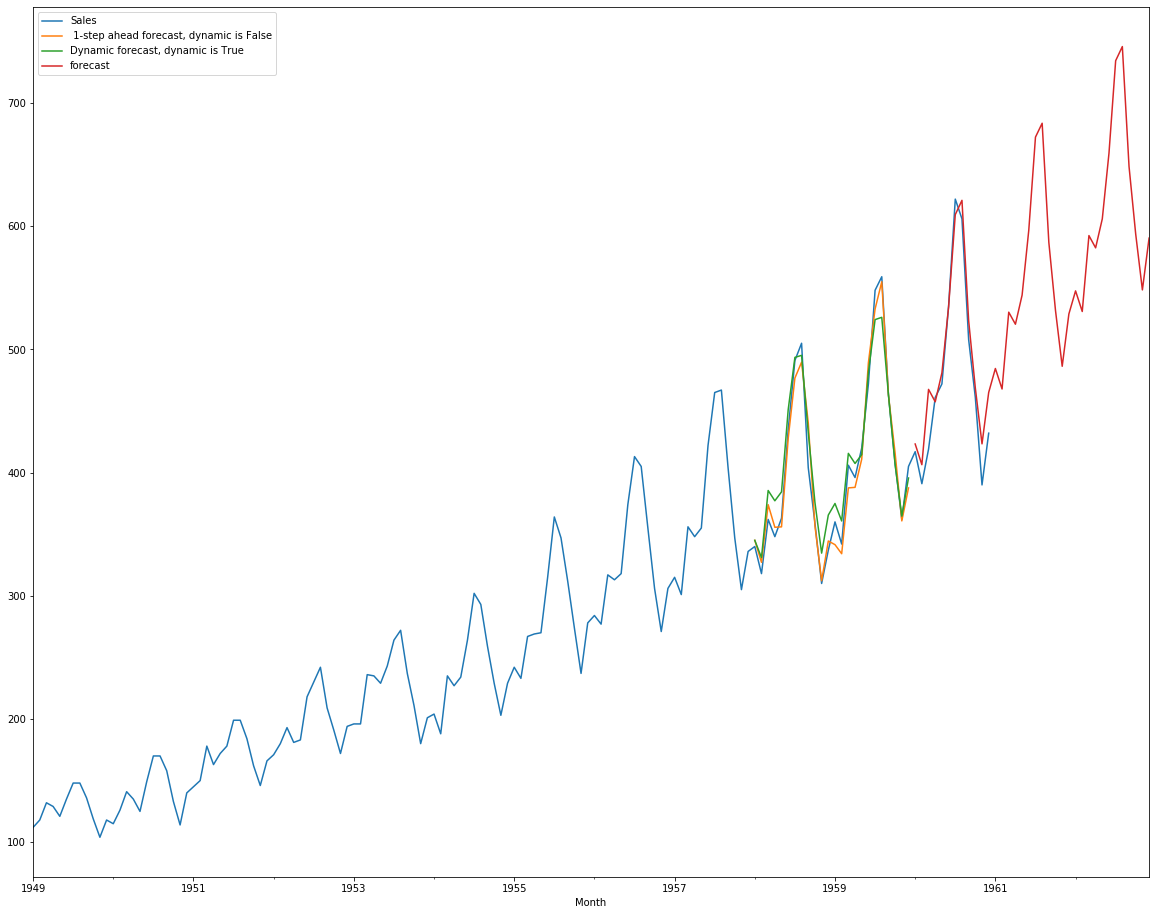

In [88]:
# plotting the values

ax = df.plot(figsize = (20,16))

pred0.predicted_mean.plot(ax =ax, label = ' 1-step ahead forecast, dynamic is False')
pred1.predicted_mean.plot(ax = ax, label = 'Dynamic forecast, dynamic is True')
pred2.predicted_mean.plot(ax = ax, label = 'forecast')
plt.legend()